#Latar Belakang
Industri perhotelan merupakan sektor yang sangat dipengaruhi oleh ketidakpastian perilaku tamu, salah satunya adalah pembatalan reservasi (booking cancellation). Fenomena pembatalan terjadi secara signifikan pada berbagai segmentasi pasar seperti Online Travel Agent (OTA), Offline TA/TO, Corporate, maupun Individual. Tingginya tingkat pembatalan menyebabkan hotel menghadapi tantangan dalam perencanaan okupansi, alokasi kamar, penentuan strategi overbooking, serta optimalisasi pendapatan (revenue management).

Data historis menunjukkan bahwa keputusan tamu untuk membatalkan reservasi dipengaruhi oleh berbagai faktor, seperti riwayat pembatalan, market segment, tipe deposit, jumlah permintaan khusus, hingga durasi pada waiting list. Tanpa analisis prediktif, hotel hanya bisa bereaksi ketika pembatalan sudah terjadi, sehingga peluang peningkatan pendapatan dan efisiensi operasional menjadi terhambat.

Dengan memanfaatkan metode Machine Learning, hotel dapat membangun sistem Booking Cancellation Prediction yang mampu memprediksi probabilitas pembatalan berdasarkan pola perilaku tamu dan karakteristik reservasi. Model prediktif ini membantu manajemen hotel dalam:

* Mengambil keputusan lebih proaktif dan berbasis data
* Mengurangi risiko kamar kosong akibat last-minute cancellation
* Menyesuaikan strategi deposit atau reminder untuk pelanggan berisiko tinggi
* Meningkatkan akurasi perencanaan okupansi dan staffing
* Mengoptimalkan strategi revenue management melalui overbooking yang terukur

Oleh karena itu, diperlukan pengembangan model prediksi pembatalan booking yang akurat dan dapat diintegrasikan ke proses operasional hotel secara berkelanjutan.

##Rumusan Masalah
Berdasarkan latar belakang tersebut, rumusan masalah yang akan dijawab melalui pengembangan Model Prediksi Pembatalan Booking adalah sebagai berikut:

1. Apa saja faktor-faktor yang mempengaruhi terjadinya pembatalan booking di hotel, baik dari sisi karakteristik tamu maupun detail reservasi?

2. Bagaimana membangun model Machine Learning yang mampu memprediksi probabilitas pembatalan booking secara akurat, sehingga hotel dapat mengantisipasi risiko pembatalan lebih awal?

3. Fitur atau variabel apa saja yang memiliki pengaruh paling signifikan terhadap keputusan pembatalan, sehingga dapat menjadi acuan dalam penyusunan strategi mitigasi?

4. Bagaimana performa model prediktif dilihat dari metrik evaluasi?

5. Bagaimana hasil prediksi ini dapat diimplementasikan dalam proses bisnis hotel, seperti:
      * kebijakan overbooking,
      * strategi deposit,
      * pengiriman reminder/pre-arrival communication,
      * dan pengelolaan alokasi kamar?

Untuk menjawab pertanyaan di atas, kita akan menganalisa data booking cancellation yang telah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1mAvfmcyRh3My6ms8mHmSuJaHspXtANor/view?usp=sharing)

#Exploratory Data Analysis (EDA)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import shap

#Xgboost
import xgboost as xgb
from xgboost import XGBClassifier

#Menyimpan Model
import joblib



Dataset ini berisi informasi pemesanan hotel di Portugal, digunakan untuk menganalisis pola reservasi, perilaku pelanggan, dan prediksi pembatalan (cancellation prediction).   
Dataset mencakup:   
**Karakteristik Pelanggan**    
* country → asal negara tamu
* customer_type → jenis pelanggan (Transient, Group, Contract, Transient-Party)   

**Karakteristik Pemesanan**   
* market_segment → segmentasi pasar (Online TA, Offline TA, Corporate, Direct, dsb.)
* reserved_room_type → jenis kamar kode anonim
* deposit_type → No Deposit / Non Refund / Refundable
* days_in_waiting_list → durasi pemesanan dalam daftar tunggu
* booking_changes → jumlah perubahan pada booking
* previous_cancellations → riwayat pembatalan sebelumnya
* total_of_special_request → permintaan khusus
* required_car_parking_space → kebutuhan parkir

**Target Variable**
* is_canceled → indikator apakah booking dibatalkan (1) atau tidak (0)

In [2]:
# Ganti 'nama_folder_anda/nama_file_anda.csv' dengan jalur ke file CSV Anda di Google Drive
file_path = '/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/data_hotel_booking_demand.csv'

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

display(df.head(),df.tail())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
df.isnull().sum().sort_values(ascending=False)

,0
country,351
market_segment,0
previous_cancellations,0
booking_changes,0
deposit_type,0
days_in_waiting_list,0
customer_type,0
reserved_room_type,0
required_car_parking_spaces,0
total_of_special_requests,0


Dari hasil, terlihat attribut country memiliki nilai null

In [5]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


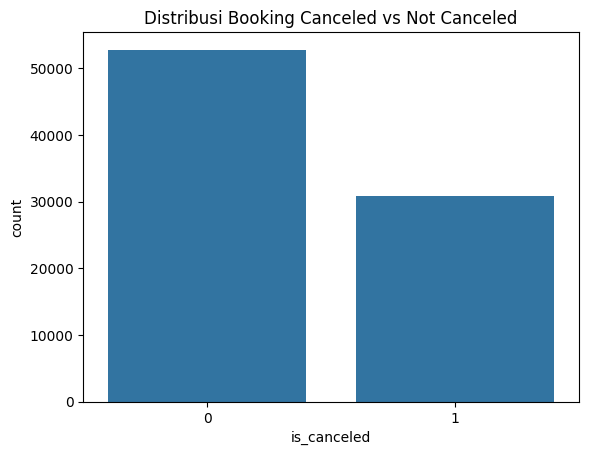

,proportion
is_canceled,
0,63.172316
1,36.827684


In [6]:
sns.countplot(x='is_canceled', data=df)
plt.title("Distribusi Booking Canceled vs Not Canceled")
plt.show()

df['is_canceled'].value_counts(normalize=True) * 100

Dari hasil terlihat bahwa 63% consumen memesan tetap akan lanjut memesan hotel, sedangkan 36% consumen melakukan canceld

###Distribusi Variabel Kategorikal

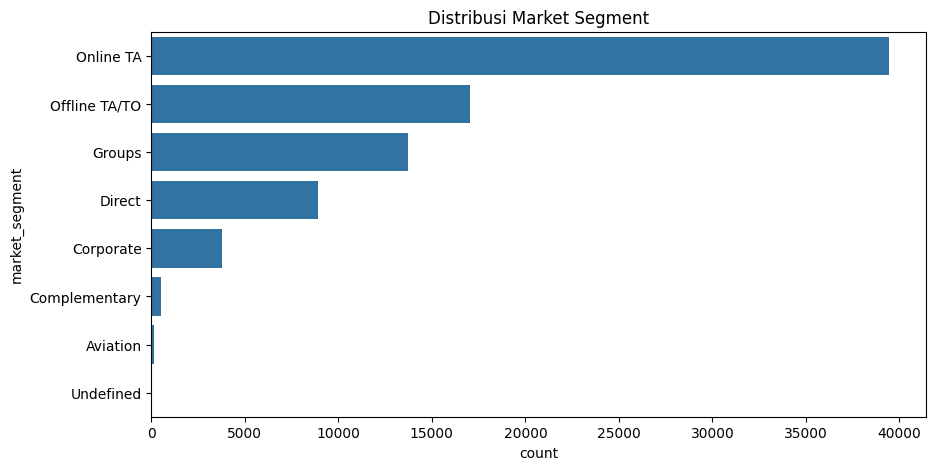

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(y='market_segment', data=df, order=df['market_segment'].value_counts().index)
plt.title("Distribusi Market Segment")
plt.show()

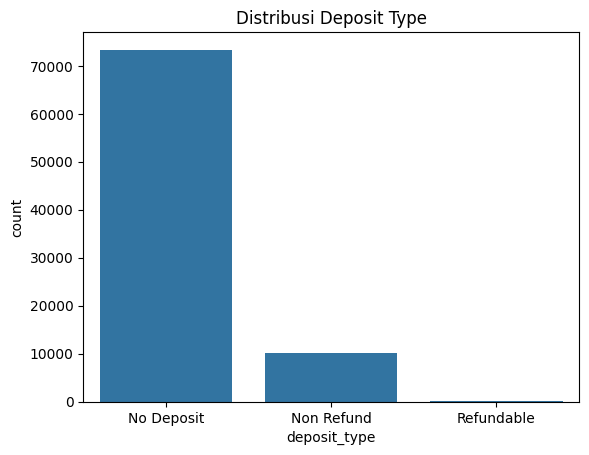

In [8]:
sns.countplot(x='deposit_type', data=df)
plt.title("Distribusi Deposit Type")
plt.show()

###Analisis Variabel Numerik

Histogram Variabel Numerik

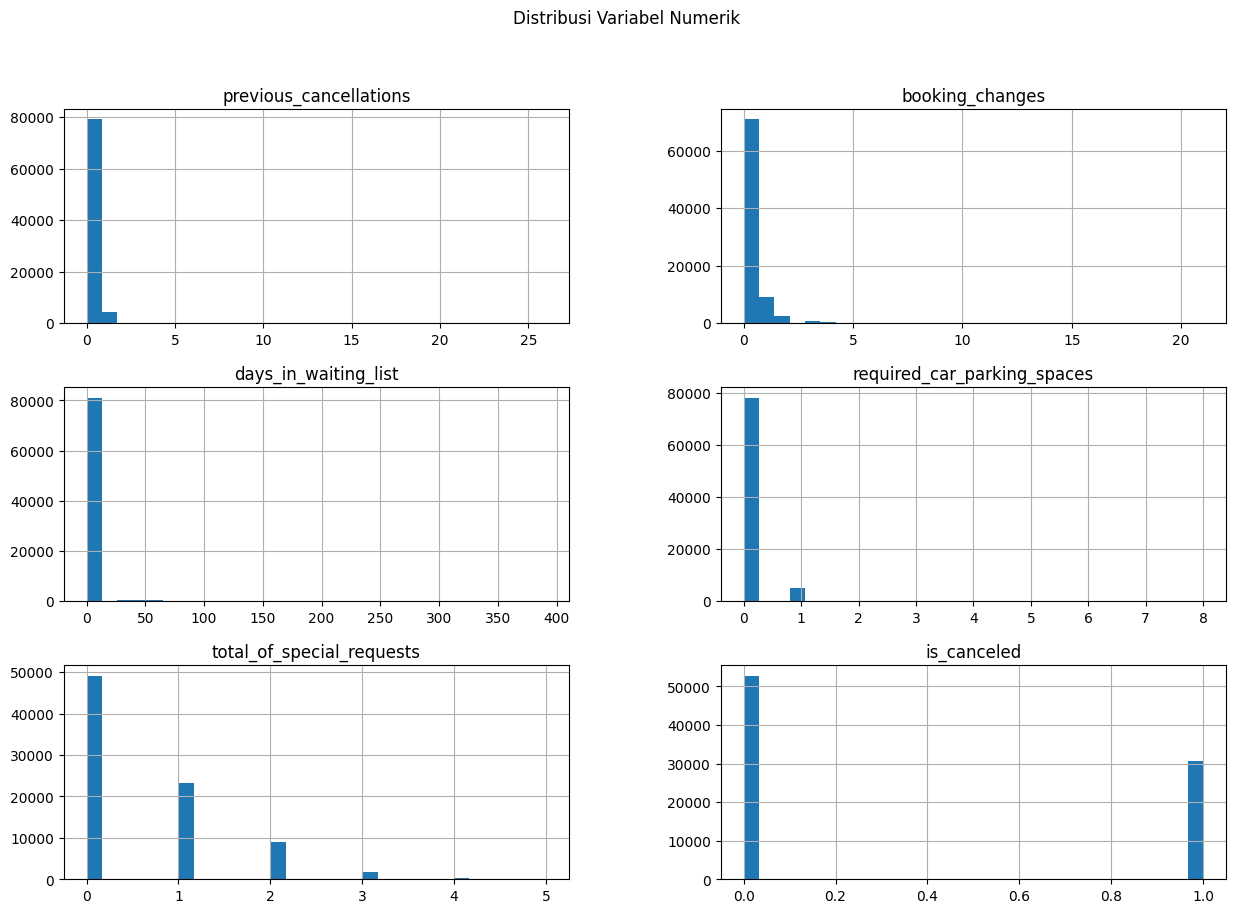

In [9]:
df.hist(figsize=(15,10), bins=30)
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

Korelasi Antar Variabel Numerik

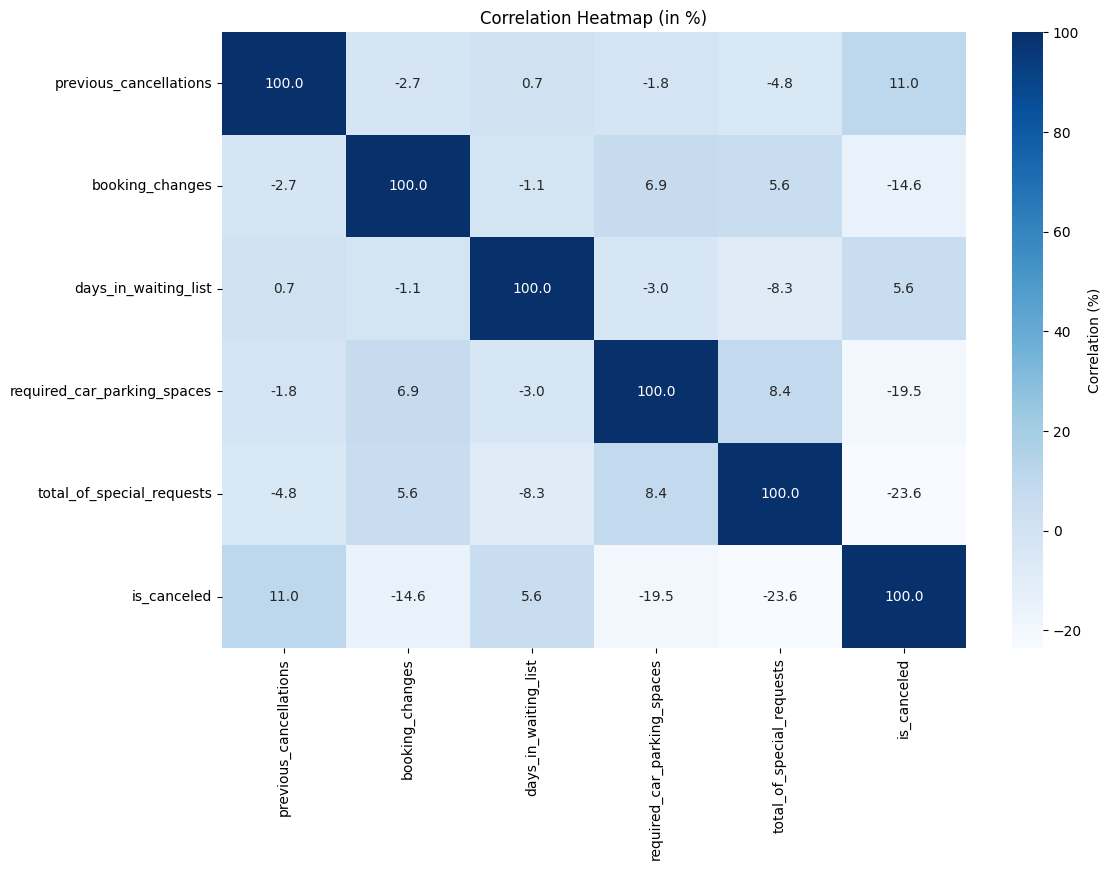

In [10]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr = numeric_df.corr() * 100  # ubah ke persen

plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".1f",        # 1 angka di belakang koma
    cmap="Blues",
    cbar_kws={'label': 'Correlation (%)'}
)
plt.title("Correlation Heatmap (in %)")
plt.show()

Secara keseluruhan, pembatalan tidak terjadi secara acak.
Tamu yang memiliki:
* riwayat pembatalan,
* banyak perubahan pada booking, dan
* waktu menunggu yang lama,
* memiliki risiko pembatalan yang lebih tinggi.

Sementara tamu dengan:
* permintaan khusus, dan
* kebutuhan tempat parkir,   

cenderung memiliki komitmen lebih kuat untuk datang.

###Analisis Faktor Utama terhadap Cancelation

Deposit Type vs Cancellation

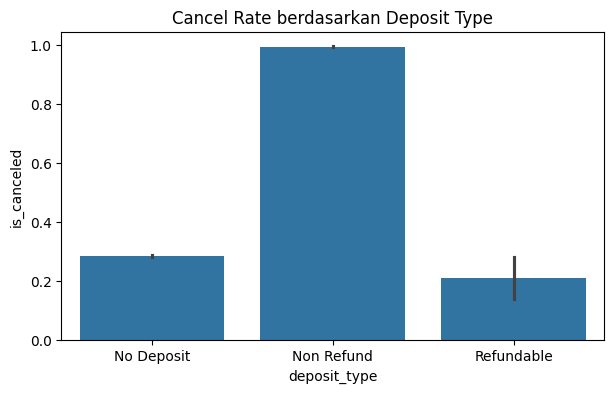

In [11]:
plt.figure(figsize=(7,4))
sns.barplot(x='deposit_type', y='is_canceled', data=df)
plt.title("Cancel Rate berdasarkan Deposit Type")
plt.show()

Market Segment vs Cancellation

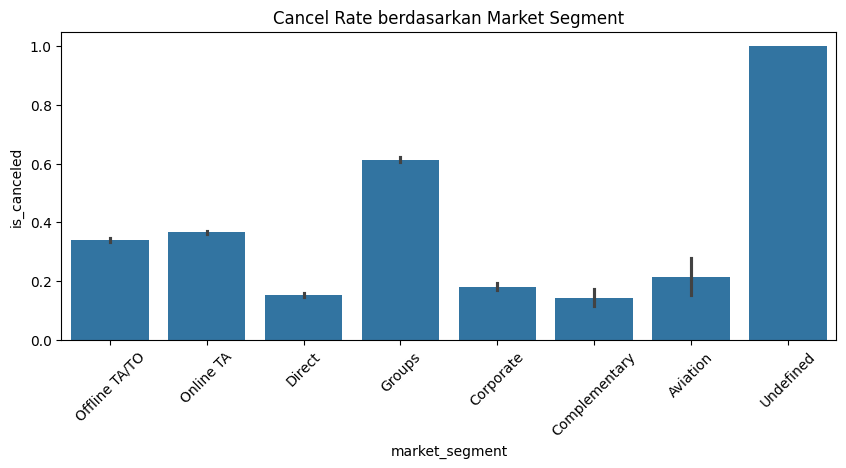

In [12]:
plt.figure(figsize=(10,4))
sns.barplot(x='market_segment', y='is_canceled', data=df)
plt.title("Cancel Rate berdasarkan Market Segment")
plt.xticks(rotation=45)
plt.show()

Previous Cancellations

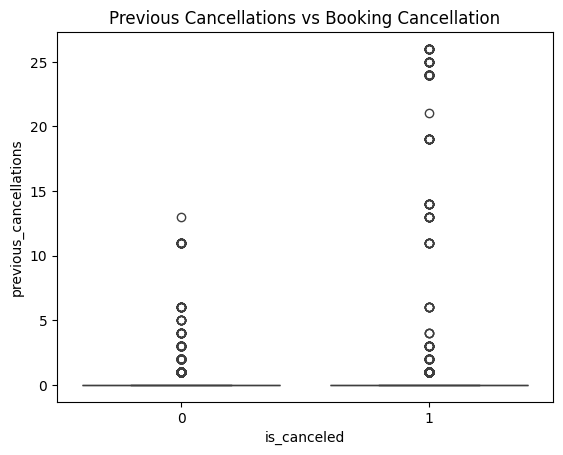

In [13]:
sns.boxplot(x='is_canceled', y='previous_cancellations', data=df)
plt.title("Previous Cancellations vs Booking Cancellation")
plt.show()

Special Request vs Cancellation

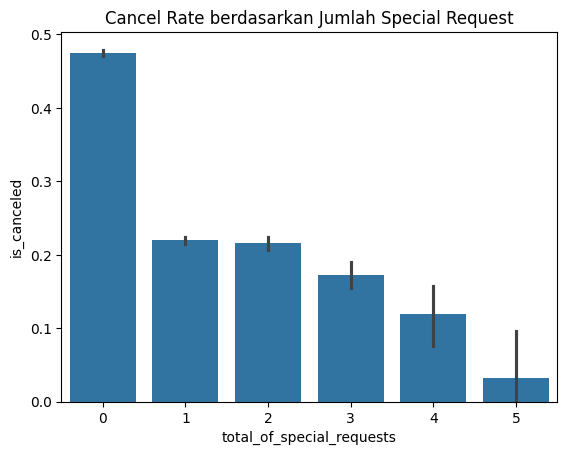

In [14]:
sns.barplot(x='total_of_special_requests', y='is_canceled', data=df)
plt.title("Cancel Rate berdasarkan Jumlah Special Request")
plt.show()

Waiting List Analysis

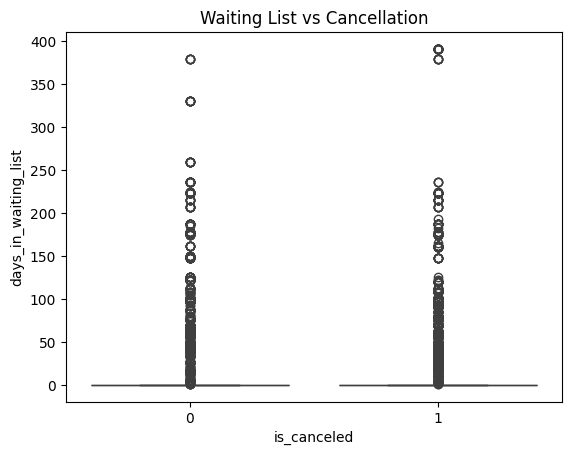

In [15]:
sns.boxplot(x='is_canceled', y='days_in_waiting_list', data=df)
plt.title("Waiting List vs Cancellation")
plt.show()

Country Analysis (Top 10)

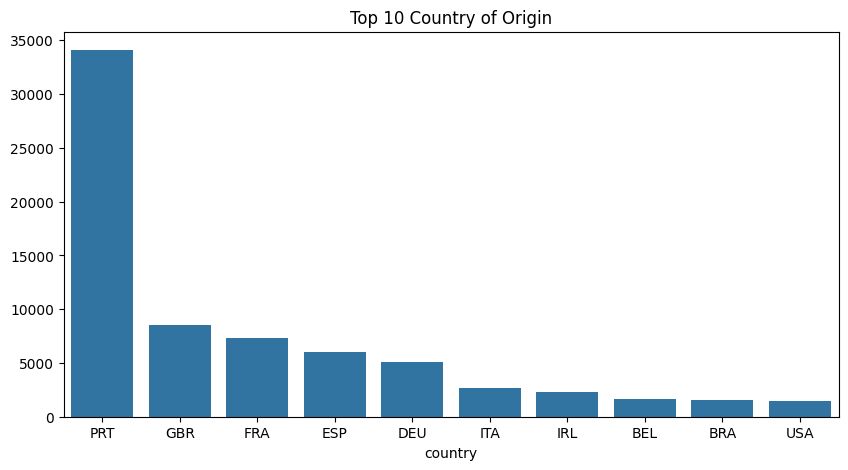

In [16]:
top10_country = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_country.index, y=top10_country.values)
plt.title("Top 10 Country of Origin")
plt.show()

#Data Cleaning

In [17]:
df.isnull().sum().sort_values(ascending=False)

,0
country,351
market_segment,0
previous_cancellations,0
booking_changes,0
deposit_type,0
days_in_waiting_list,0
customer_type,0
reserved_room_type,0
required_car_parking_spaces,0
total_of_special_requests,0


Terlihat bahwa county memiliki data null sekitar 351

Data null tersebut akan kita masukan data moodus yang ada di dalam attribut tersebut

In [18]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

/tmp/ipython-input-2863300244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [19]:
df.isnull().sum().sort_values(ascending=False)

,0
country,0
market_segment,0
previous_cancellations,0
booking_changes,0
deposit_type,0
days_in_waiting_list,0
customer_type,0
reserved_room_type,0
required_car_parking_spaces,0
total_of_special_requests,0


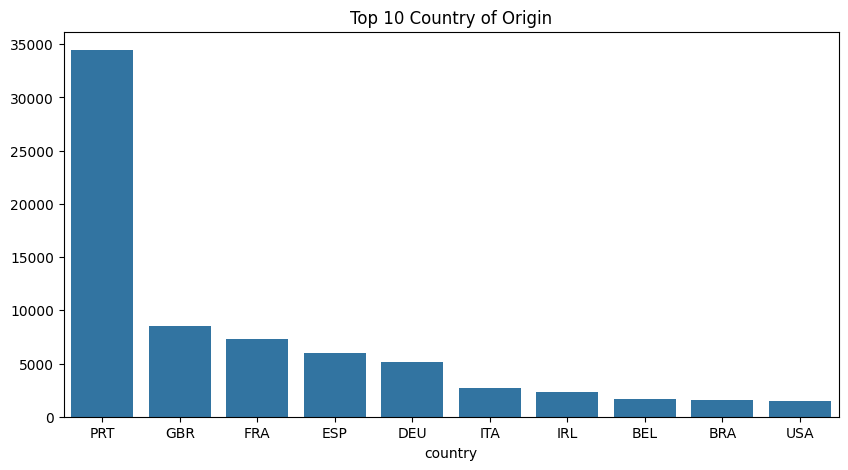

In [21]:
top10_country = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_country.index, y=top10_country.values)
plt.title("Top 10 Country of Origin")
plt.show()

#Feature Engineering

In [22]:
df_fe = df.copy()

##Membuat Feature Baru

Previous Cancellation Ratio   
Apakah tamu sering membatalkan sebelum-sebelumnya?

In [23]:
df_fe['cancel_ratio'] = df_fe['previous_cancellations'] / (
    df_fe['previous_cancellations'] + 1
)

Change Behavior (perubahan booking)    
Semakin sering tamu mengubah booking, biasanya lebih berisiko membatalkan.

In [24]:
df_fe['change_indicator'] = df_fe['booking_changes'].apply(lambda x: 1 if x > 0 else 0)

Special Request Indicator    
Tamu dengan banyak special request biasanya lebih serius (risiko cancel kecil).

In [25]:
df_fe['has_special_request'] = df_fe['total_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)

Kompresi kategori Country → Top 10 + Other

In [27]:
top_10_country = df_fe['country'].value_counts().head(10).index
df_fe['country_grouped'] = df_fe['country'].apply(lambda x: x if x in top_10_country else "Other")

Market Segment Grouping (OTA vs Non-OTA)

In [28]:
df_fe['is_ota'] = df_fe['market_segment'].apply(
    lambda x: 1 if x.lower() in ['online ta', 'ta/to'] else 0
)

Deposit Category Indicator    
Deposit sangat berpengaruh pada cancellation.

In [29]:
df_fe['deposit_flag'] = df_fe['deposit_type'].apply(
    lambda x: 0 if x.lower() == 'no deposit' else 1
)

##Encoding Fitur Kategorikal ke Numeric

In [30]:
cat_features = [
    'market_segment',
    'deposit_type',
    'customer_type',
    'reserved_room_type',
    'country_grouped'
]

df_fe = pd.get_dummies(df_fe, columns=cat_features, drop_first=True)

##Drop Fitur yang Tidak Lagi Dibutuhkan

In [31]:
df_fe.drop(['country'], axis=1, inplace=True)
df_fe.drop(['booking_changes'], axis=1, inplace=True)

##Cek Hasil Feature Engineering

In [32]:
df_fe.head()

,previous_cancellations,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,cancel_ratio,change_indicator,has_special_request,is_ota,deposit_flag,...,country_grouped_BRA,country_grouped_DEU,country_grouped_ESP,country_grouped_FRA,country_grouped_GBR,country_grouped_IRL,country_grouped_ITA,country_grouped_Other,country_grouped_PRT,country_grouped_USA
0,0,0,0,0,0,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,2,0,0.0,0,1,1,0,...,False,False,False,True,False,False,False,False,False,False
2,0,0,0,2,0,0.0,1,1,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,0,0,1,1,0.0,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
4,0,0,0,2,0,0.0,1,1,1,0,...,False,False,False,False,False,False,False,False,True,False


In [34]:
bool_cols = df_fe.select_dtypes(include='bool').columns
bool_cols

Index(['market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
       'country_grouped_BRA', 'country_grouped_DEU', 'country_grouped_ESP',
       'country_grouped_FRA', 'country_grouped_GBR', 'country_grouped_IRL',
       'country_grouped_ITA', 'country_grouped_Other', 'country_grouped_PRT',
       'country_grouped_USA'],
      dtype='object')

In [35]:
df_fe[bool_cols] = df_fe[bool_cols].astype(int)

In [36]:
df_fe[bool_cols].head()

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,...,country_grouped_BRA,country_grouped_DEU,country_grouped_ESP,country_grouped_FRA,country_grouped_GBR,country_grouped_IRL,country_grouped_ITA,country_grouped_Other,country_grouped_PRT,country_grouped_USA
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# Export ke CSV
output_path = "/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/data_hotel_booking_demand_feature_engineered.csv"
df_fe.to_csv(output_path, index=False)

output_path

'/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/data_hotel_booking_demand_feature_engineered.csv'

#Modeling

In [39]:
X = df_fe.drop("is_canceled", axis=1)
y = df_fe["is_canceled"]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% data testing
    random_state=42,       # agar hasil konsisten
    stratify=y             # menjaga proporsi kelas
)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66858, 40), (16715, 40), (66858,), (16715,))

##Logistic Regression

In [43]:
logreg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [44]:
logreg_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [45]:
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

In [46]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== Logistic Regression Evaluation ===")
print("Accuracy       :", acc)
print("Precision      :", prec)
print("Recall         :", rec)
print("F1-Score       :", f1)
print("ROC-AUC Score  :", roc_auc)

=== Logistic Regression Evaluation ===
Accuracy       : 0.7861800777744541
Precision      : 0.7784728213977566
Recall         : 0.5862573099415205
F1-Score       : 0.66882876204596
ROC-AUC Score  : 0.8667191764632545


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     10559
           1       0.78      0.59      0.67      6156

    accuracy                           0.79     16715
   macro avg       0.78      0.74      0.76     16715
weighted avg       0.79      0.79      0.78     16715



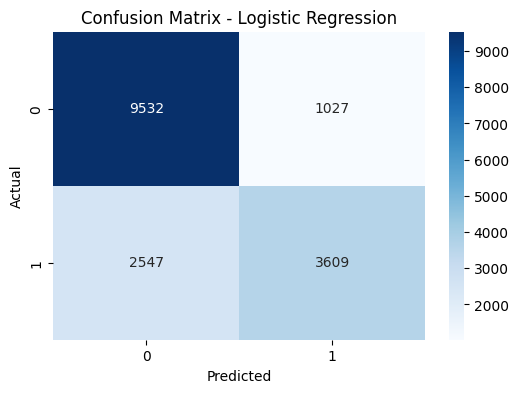

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

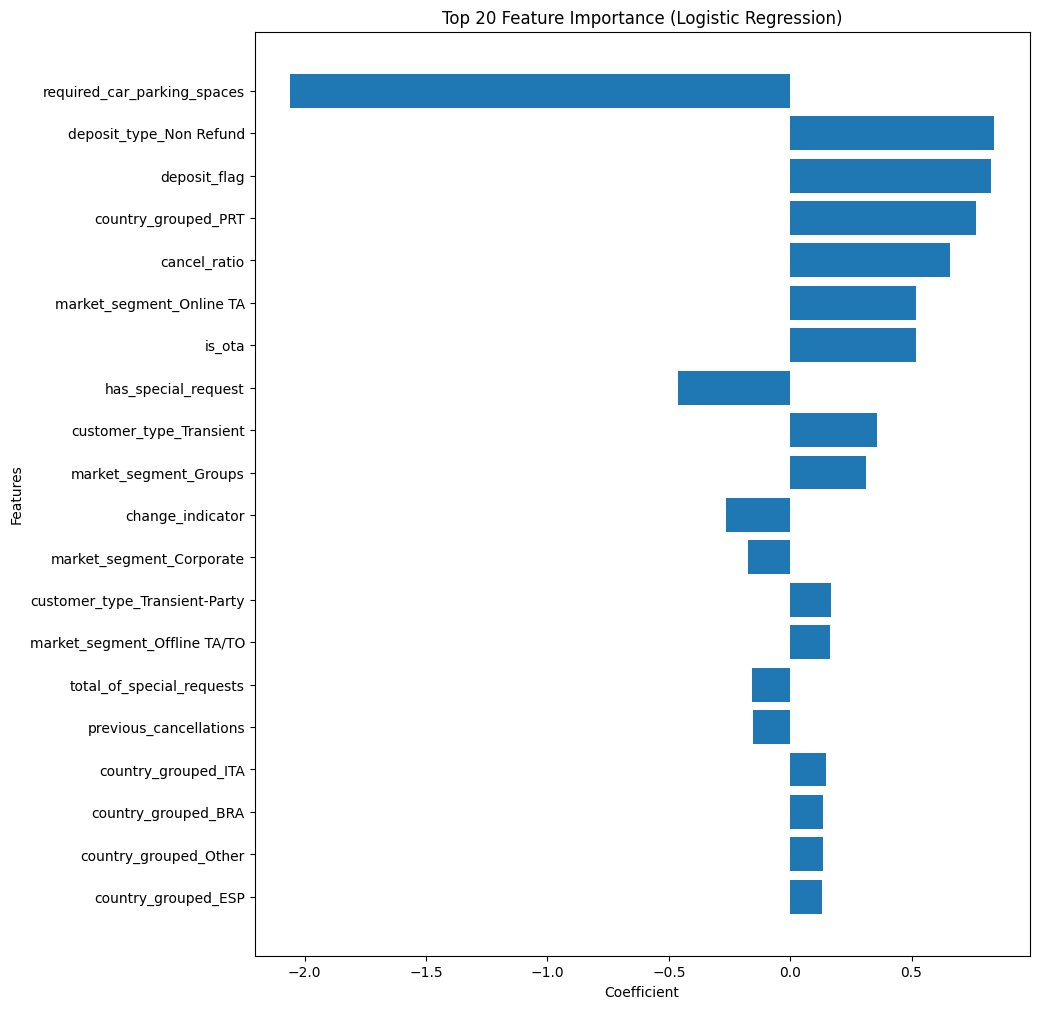

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))
plt.barh(
    feature_importance['Feature'].head(20),
    feature_importance['Coefficient'].head(20)
)
plt.title("Top 20 Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

Berdasarkan hasil diatas dapat kita simpulkan :    
* Fitur paling atas → paling memengaruhi model
* Nilai positif → meningkatkan risiko pembatalan
* Nilai negatif → menurunkan risiko pembatalan

Maka dapat kita simpulkan :    
**Fitur positif (penambah risiko cancel):**     
* Tidak ada deposit
* OTA market segment
* Tinggi previous cancellations
* Banyak booking changes
* Lama di waiting list

**Fitur negatif (penurun risiko cancel):**     
* Banyak special requests
* Customer corporate
* Booking dengan deposit

**Kesimpulan Logistic Regresion  :**
1. Model Logistic Regression memiliki performa cukup baik sebagai baseline dengan accuracy 78,6% dan ROC-AUC 86,6%.
2. Model lebih kuat dalam mengidentifikasi tamu yang tidak cancel, namun masih kesulitan mendeteksi tamu yang berpotensi cancel (recall kelas 1 = 59%).
3. Sekitar 40% pembatalan masih tidak terdeteksi, sehingga hotel tetap berisiko terhadap last-minute cancellation.
4. Untuk kebutuhan operasional hotel (forecast okupansi, overbooking, reminder otomatis), recall kelas 1 harus ditingkatkan.

##Random Forest

In [53]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'   # penting supaya kelas cancel terbantu
)

In [54]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [55]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [56]:
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

print("=== Random Forest Evaluation ===")
print("Accuracy       :", acc)
print("Precision      :", prec)
print("Recall         :", rec)
print("F1-Score       :", f1)
print("ROC-AUC Score  :", roc_auc)

=== Random Forest Evaluation ===
Accuracy       : 0.7944361352078971
Precision      : 0.6983085447652376
Recall         : 0.7779402209226771
F1-Score       : 0.7359766405409559
ROC-AUC Score  : 0.8899576921682866


In [57]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     10559
           1       0.70      0.78      0.74      6156

    accuracy                           0.79     16715
   macro avg       0.78      0.79      0.78     16715
weighted avg       0.80      0.79      0.80     16715



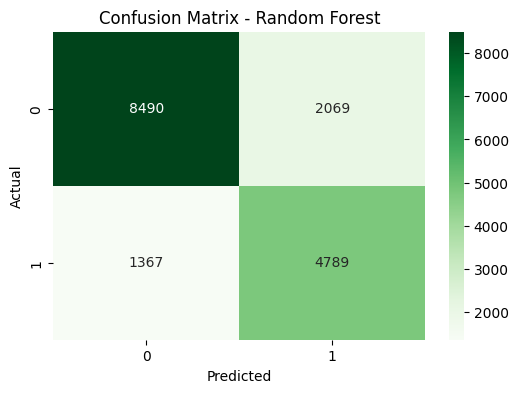

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###Tuning Random Forest

In [60]:
rf_base = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [61]:
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,                 # 3-fold cross validation
    scoring='f1',         # fokus di F1 untuk kelas cancel
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [62]:
print("Best params:", grid_search.best_params_)
print("Best CV F1-score:", grid_search.best_score_)

Best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV F1-score: 0.7393202330762252


In [63]:
rf_best = grid_search.best_estimator_

y_pred_rf_best = rf_best.predict(X_test)
y_proba_rf_best = rf_best.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred_rf_best)
prec = precision_score(y_test, y_pred_rf_best)
rec = recall_score(y_test, y_pred_rf_best)
f1 = f1_score(y_test, y_pred_rf_best)
roc_auc = roc_auc_score(y_test, y_proba_rf_best)

print("=== Tuned Random Forest Evaluation ===")
print("Accuracy       :", acc)
print("Precision      :", prec)
print("Recall         :", rec)
print("F1-Score       :", f1)
print("ROC-AUC Score  :", roc_auc)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_rf_best))

=== Tuned Random Forest Evaluation ===
Accuracy       : 0.7970086748429555
Precision      : 0.7062863968941318
Recall         : 0.7683560753736193
F1-Score       : 0.7360149381467361
ROC-AUC Score  : 0.8910318107338443

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     10559
           1       0.71      0.77      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.79     16715
weighted avg       0.80      0.80      0.80     16715



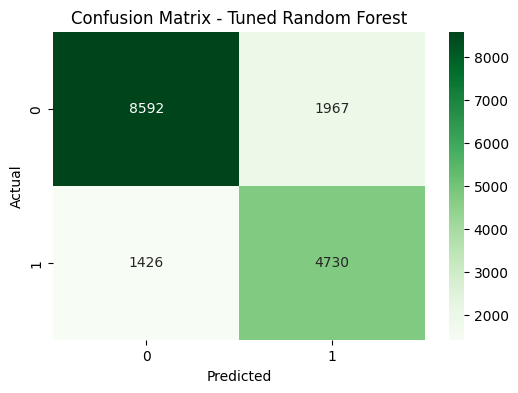

In [64]:
cm = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

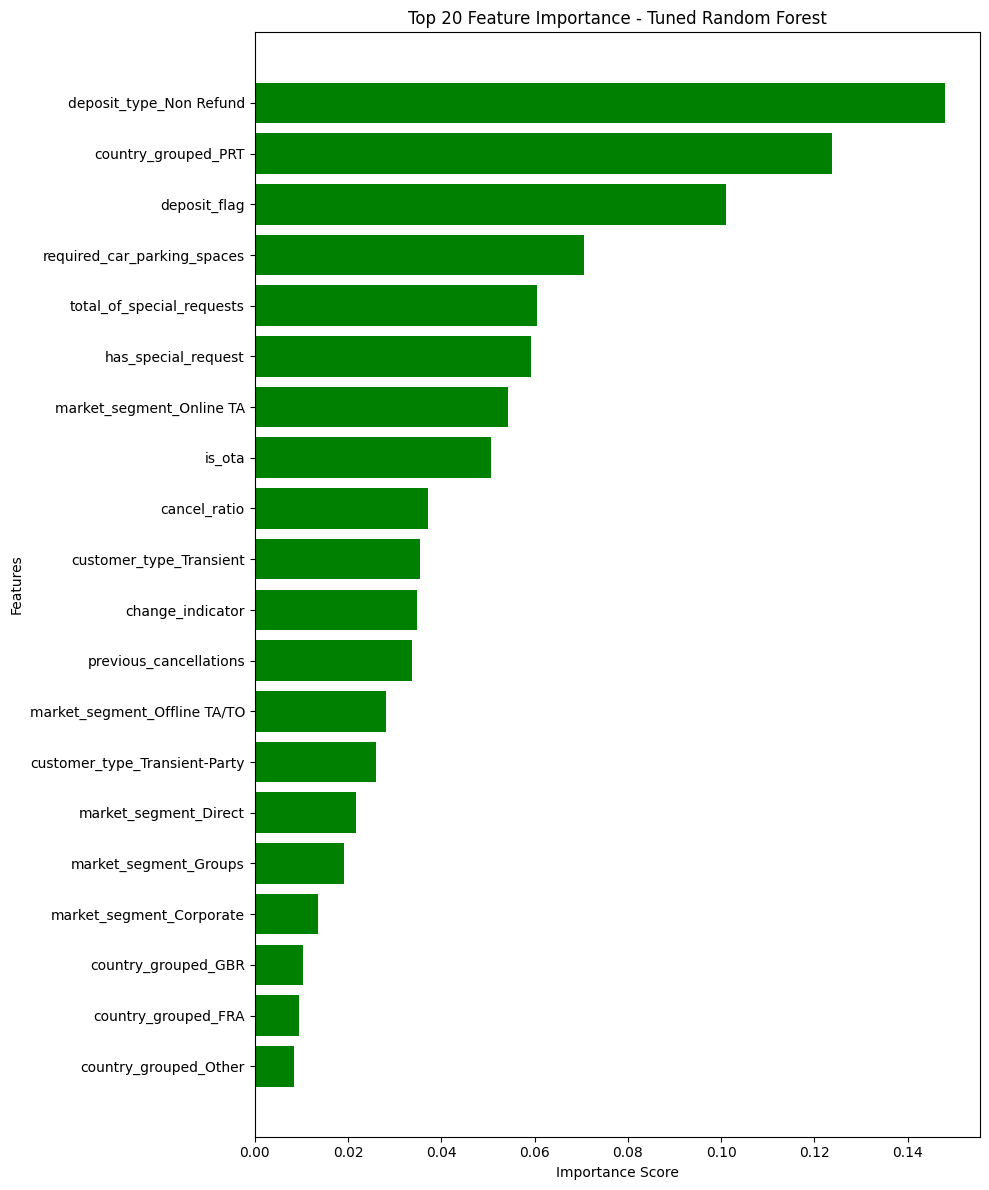

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.barh(
    rf_importance_df['Feature'].head(20),
    rf_importance_df['Importance'].head(20),
    color='green'
)
plt.title("Top 20 Feature Importance - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # agar fitur terpenting di atas
plt.tight_layout()
plt.show()

##XGBoost

In [68]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

In [69]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

In [71]:
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb_proba)

print("=== XGBoost Evaluation ===")
print("Accuracy       :", acc)
print("Precision      :", prec)
print("Recall         :", rec)
print("F1-Score       :", f1)
print("ROC-AUC Score  :", roc_auc)

=== XGBoost Evaluation ===
Accuracy       : 0.8127430451690099
Precision      : 0.7792543373938723
Recall         : 0.6858349577647823
F1-Score       : 0.729566269224123
ROC-AUC Score  : 0.8920872373379423


In [72]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     10559
           1       0.78      0.69      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



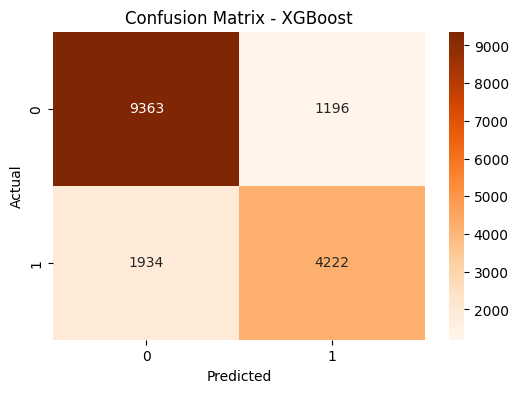

In [73]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Ringkasan Evaluasi

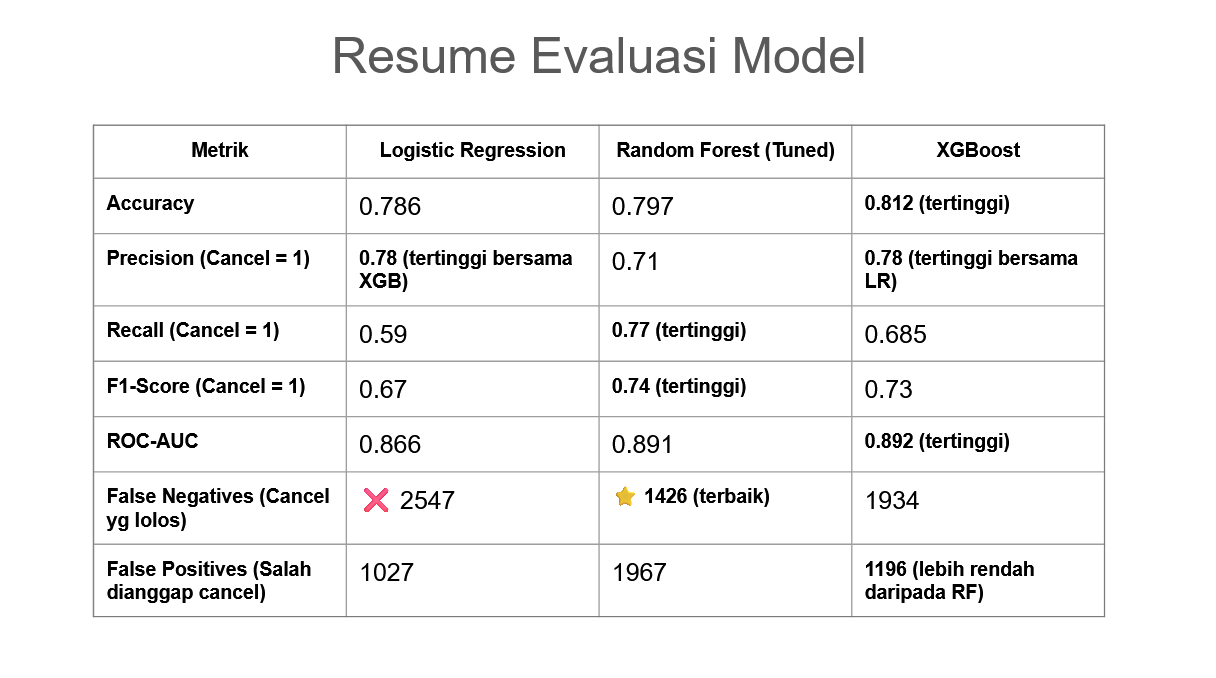

Berdasrkan rumusan masalah yang kita buat model Machine Learning yang mampu memprediksi probabilitas pembatalan booking secara akurat, sehingga hotel dapat mengantisipasi risiko pembatalan lebih awal.    
Maka kita akan memilih model **Random Forest** tujuanya **mengurangi risiko last-minute cancellation** (mendeteksi sebanyak mungkin tamu yang cancel).

#Simpan Model

Menyimpan Model Random Forest

In [66]:
feature_list = X_train.columns.tolist()
joblib.dump(rf_best, "/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/tuned_random_forest_model.pkl")


['/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/tuned_random_forest_model.pkl']

Menyimpan Model XGBoost

In [74]:
joblib.dump(xgb_model, "/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/xgboost_booking_model.pkl")
joblib.dump(X_train.columns.tolist(), "/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/xgb_feature_columns.pkl")

['/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone_Project_Hotel_Booking_Demand/xgb_feature_columns.pkl']